In [1]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('Natural Disasters Test.CSV')

# 显示数据前几行
print(df.head())


        Entity  Year  Earthquake Deaths  Earthquake Injuries  \
0  Afghanistan  1954             2000.0                  0.0   
1  Afghanistan  1956              100.0               2000.0   
2  Afghanistan  1963                NaN                  NaN   
3  Afghanistan  1969                NaN                  NaN   
4  Afghanistan  1971                NaN                  NaN   

   People Affected by Earthquake  Homeless People from Earthquake  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            NaN                              NaN   
3                            NaN                              NaN   
4                            NaN                              NaN   

   Economic Damage from Earthquake  
0                              0.0  
1                       25000000.0  
2                              NaN  
3                              NaN  
4              

C:\Users\Hezhili\AppData\Local\Temp\ipykernel_32712\303033160.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:

# 按 Entity 分组并计算每列的总和，移除 'Year' 列
grouped_data = df.groupby('Entity').sum().reset_index().drop(columns=['Year'])

# 将最后一列的数据转换为浮点数（如果之前是整数，先转为浮点数，避免除法后得到整数结果）
grouped_data['Economic Damage from Earthquake'] = grouped_data['Economic Damage from Earthquake'].astype(float)

# 将最后一列的数据除以一百万（1 million）
grouped_data['Economic Damage from Earthquake'] /= 1000000

# 显示结果
print(grouped_data.head(10))

                Entity  Earthquake Deaths  Earthquake Injuries  \
0          Afghanistan            12617.0              71926.0   
1              Albania              113.0               1668.0   
2              Algeria             6483.0              25651.0   
3               Angola                0.0                  0.0   
4  Antigua and Barbuda                0.0                  0.0   
5            Argentina               76.0                379.0   
6              Armenia                0.0                  0.0   
7            Australia               12.0                136.0   
8              Austria                0.0                  0.0   
9           Azerbaijan               33.0                678.0   

   People Affected by Earthquake  Homeless People from Earthquake  \
0                       879889.0                         139575.0   
1                       209590.0                           5150.0   
2                       561003.0                         801050.0 

In [11]:
# 计算这些列的总和
sum_columns = grouped_data[['Earthquake Deaths', 'Earthquake Injuries', 'People Affected by Earthquake',
                  'Homeless People from Earthquake', 'Economic Damage from Earthquake']].sum(axis=1)
sum_columns

# 筛选出总和不为0的实体
nonzero_entities = grouped_data.loc[sum_columns != 0, 'Entity'].unique()

# 使用筛选后的实体列表过滤数据框
grouped_data = grouped_data[grouped_data['Entity'].isin(nonzero_entities)]

# 显示结果
print(grouped_data.head(10))

         Entity  Earthquake Deaths  Earthquake Injuries  \
0   Afghanistan            12617.0              71926.0   
1       Albania              113.0               1668.0   
2       Algeria             6483.0              25651.0   
5     Argentina               76.0                379.0   
6       Armenia                0.0                  0.0   
7     Australia               12.0                136.0   
9    Azerbaijan               33.0                678.0   
11   Bangladesh               45.0                895.0   
12     Barbados                0.0                  1.0   
14      Belgium                2.0                 30.0   

    People Affected by Earthquake  Homeless People from Earthquake  \
0                        879889.0                         139575.0   
1                        209590.0                           5150.0   
2                        561003.0                         801050.0   
5                         47300.0                          40200.0   


In [14]:
grouped_data['People Affected by Earthquake']

0      879889.0
1      209590.0
2      561003.0
5       47300.0
6       15000.0
         ...   
176     43544.0
178     50000.0
179     13000.0
180     80300.0
182         0.0
Name: People Affected by Earthquake, Length: 103, dtype: float64

In [13]:
import json

# 生成 JSON 数据
json_data = {}
for _, row in grouped_data.iterrows():
    country = row['Entity']
    damage = row['People Affected by Earthquake']
    json_data[country] = {'$count': damage}

# 将数据保存到 JSON 文件中
with open('economic_damage.json', 'w') as f:
    json.dump(json_data, f, indent=4)

print("JSON 文件已生成！")

JSON 文件已生成！


In [76]:
import matplotlib.pyplot as plt

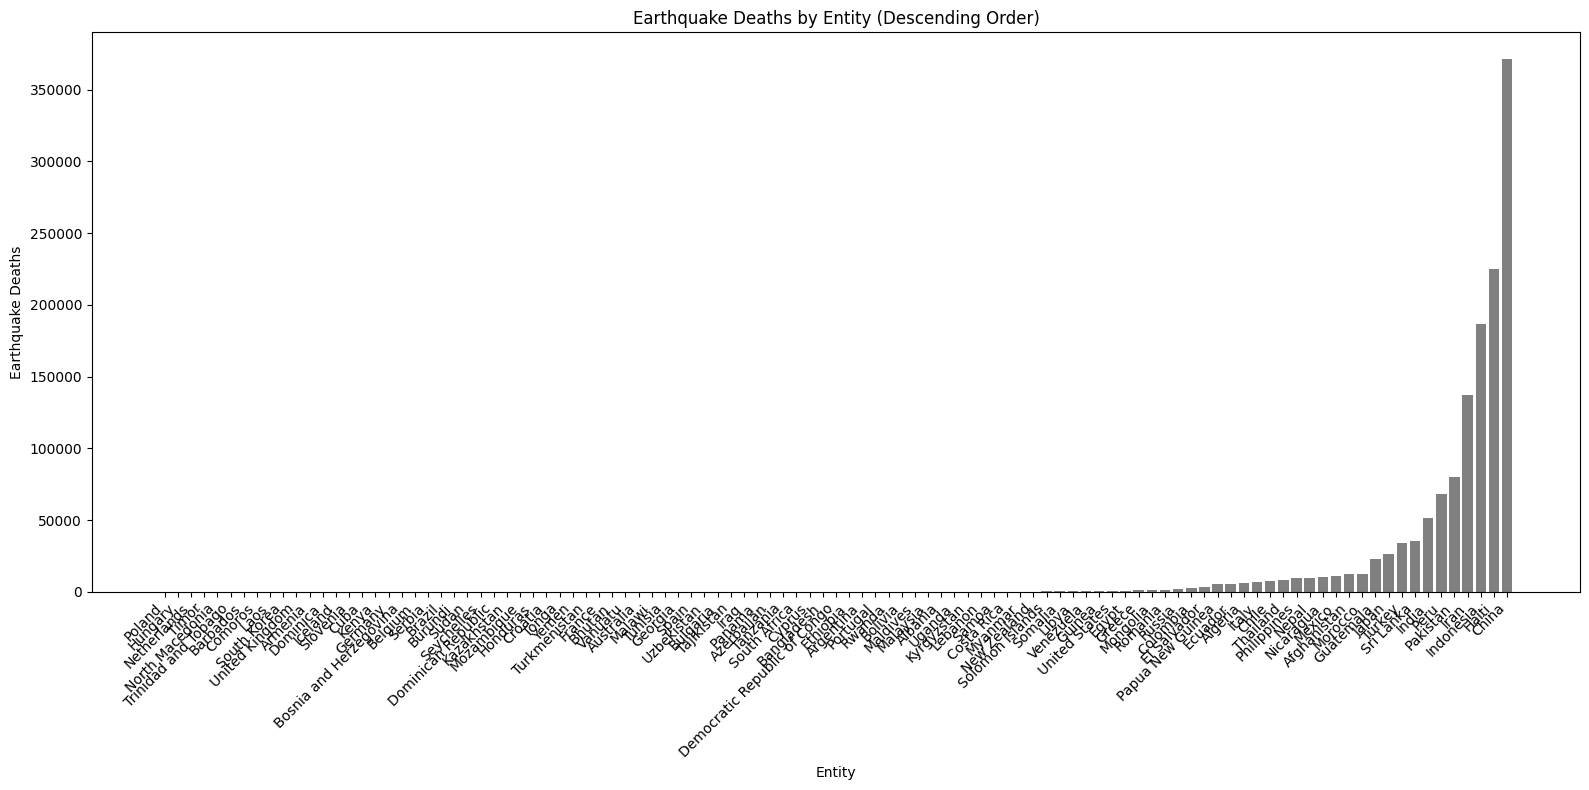

In [84]:
# 按照地震死亡人数降序排列实体
grouped_data = grouped_data.sort_values(by='Earthquake Deaths', ascending=True)

# 可视化数据
plt.figure(figsize=(16, 8))
plt.bar(grouped_data['Entity'], grouped_data['Earthquake Deaths'], color='gray')
plt.xlabel('Entity')
plt.ylabel('Earthquake Deaths')
plt.title('Earthquake Deaths by Entity (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()